# Random Walk
## Packages and Config

In [78]:
include("RandomWalk.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles, StatsBase, Distributions
figpath = "../fig/random-walk/"

"../fig/random-walk/"

## No Boundaries

In [79]:
time, p, walks = 2000, 0.5, 1000000
percent = Integer(round(p * 100))

50

In [80]:
coordinates, path = RandomWalk.randomwalk(time, p, walks=walks)

(Integer[-226, -214, -212, -206, -202, -198, -196, -194, -190, -188  …  182, 184, 186, 188, 190, 192, 196, 206, 218, 220], [1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0  …  5.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0])

In [81]:
# expected distribution
# units are normalized in a way that l=1 and τ=1
σ² = 4 * p * (1 - p) * time
σ = √σ²
meanpos = (2p - 1) * time
dist = Normal(meanpos, σ)

Normal{Float64}(μ=0.0, σ=44.721359549995796)

In [82]:
# simulated distribution
meanpossim = mean(coordinates, weights(path))
# weighted standard deviation
σsim = √(sum(path .* (coordinates .- mean(coordinates, weights(path))).^2) / sum(path))

44.743681297159085

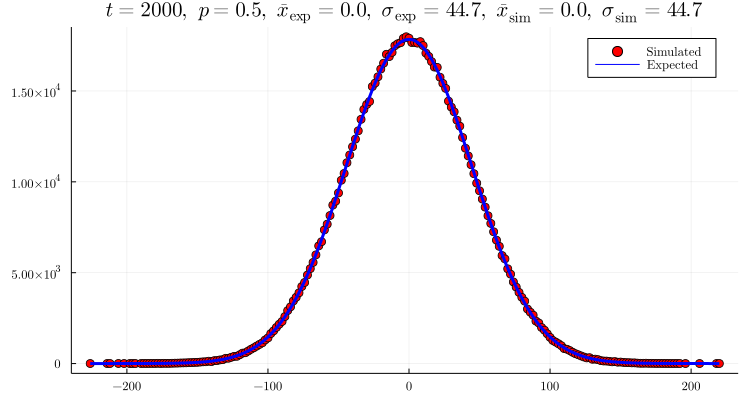

In [83]:
pl = scatter(coordinates, path, color=:red, ms=5, label="Simulated", fontfamily="Computer Modern",
    title="\$t=$time,\\ p=$p,\\ \\bar{x}_{\\textrm{exp}}=$(round(meanpos, digits=1)),\\ "
    * "\\sigma_{\\textrm{exp}} = $(round(σ, digits=1)),\\ "
    * "\\bar{x}_{\\textrm{sim}} = $(abs(round(meanpossim, digits=1))),\\ "
    * "\\sigma_{\\textrm{sim}} = $(round(σsim, digits=1))\$", size = (750, 400))
plot!(pl, coordinates, pdf(dist, coordinates) .* 2walks, color=:blue, lw=3, label="Expected")

savefig(pl, figpath * "randomwalk-$percent.pdf")
display(pl)